Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as Enc
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

Reading dataset file

In [2]:
dataset = pd.read_csv("/home/shenpai/Documents/DEVGURU/Python/GMC/titanic-passengers.csv", sep=";")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


Data pre-processing and defining training and test sets

In [3]:
#Filling missing values

dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)
dataset['Cabin'] = dataset.Cabin.fillna('G6')

#Feature transformation 
dataset.Sex = Enc().fit_transform(dataset.Sex) 
dataset.Survived = Enc().fit_transform(dataset.Survived)


#Spliting dataset

x = dataset.drop(["PassengerId","Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y = dataset["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

Applying decision tree

In [4]:
dtree = DecisionTreeClassifier(splitter = 'random', max_leaf_nodes = 10, 
min_samples_leaf = 5, max_depth = 5)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print(f"Accuracy:{round(metrics.accuracy_score(y_test, pred),3)}")

Accuracy:0.804


Plot decision tree

'\nimport graphviz\ndot_data = export_graphviz(dtree, out_file = None, feature_names = x.columns)\ngraph = graphviz.Source(dot_data)\ngraph.render("data")\ngraph'

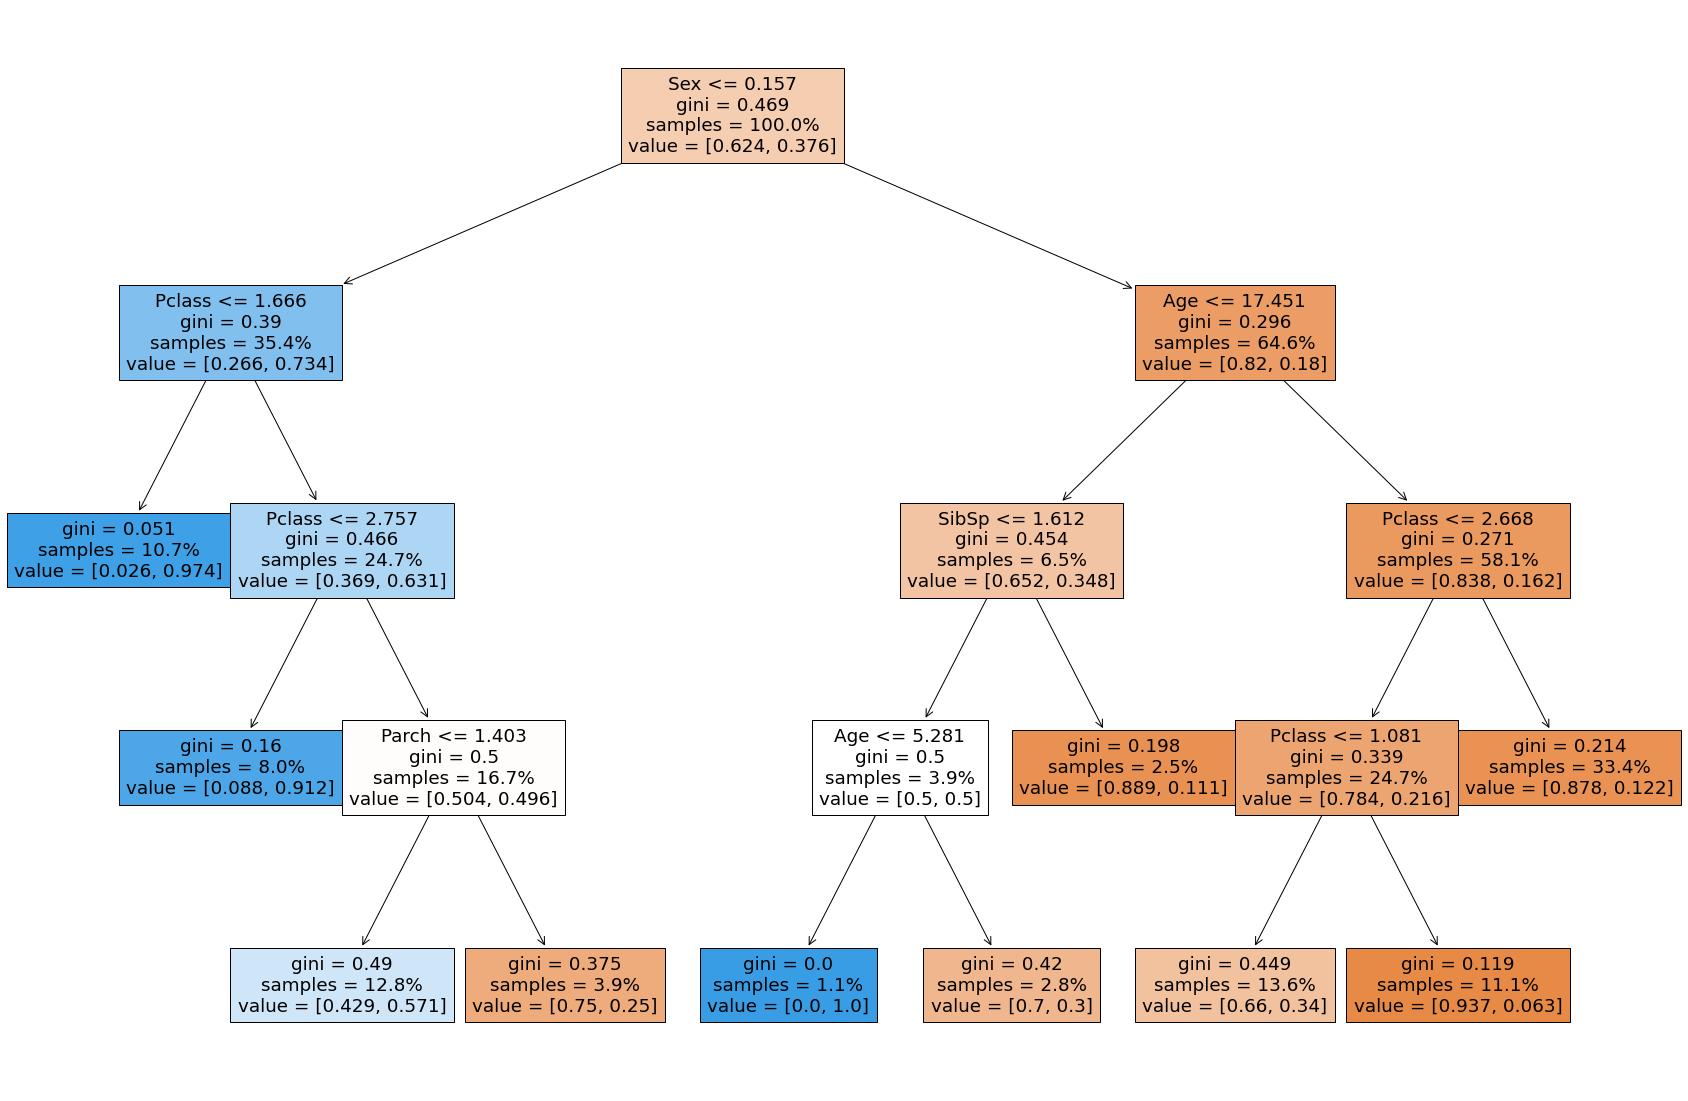

In [5]:
#First methode
plt.figure(figsize = (30,20))
plot_tree(dtree, filled = True, feature_names = x.columns, proportion = True)

#Second Methode
"""
import graphviz
dot_data = export_graphviz(dtree, out_file = None, feature_names = x.columns)
graph = graphviz.Source(dot_data)
graph.render("data")
graph"""


Decision Tree interpretation

We will try to manually predict if the first passenger in the dataset survived or not:

First we start with his/her Sex: Male, which is greater than 0.157 so we go right.

We then have the passenger's Age: 28, which is greater than 17.451 so go right again.

The Pclass is 2, less than 2.668 so we proceed to the left.

On this node we test Pclass for a second time: greater than 1.081 so we continue to the right.

We reached a leaf in which the prediction class corresponds to target class with more values, in this case 0 with a percentage of 93.7%.

Conclusion: the passenger did not survive, a correct prediction according to the dataset

Second decision tree

In [6]:
dtree = DecisionTreeClassifier(splitter = 'best', max_leaf_nodes = 6, 
min_samples_leaf = 5, max_depth = 3)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6, min_samples_leaf=5)

In [7]:
# New accuracy
pred = dtree.predict(x_test)
print(f"Accuracy:{round(metrics.accuracy_score(y_test, pred),3)}")


Accuracy:0.81


The parameters changed were splitter, max_leaf_nodes, and max_depth. Those changes improved our model's accuracy slightly, from 80.4% to 81%

Random Forest

In [8]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(x_train, y_train) 
pred = clf.predict(x_test)
print(f"Accuracy:{round(metrics.accuracy_score(y_test, pred),3)}")

Accuracy:0.793


In [11]:
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [12]:
# New accuracy

pred = clf.predict(x_test)
print(f"Accuracy:{round(metrics.accuracy_score(y_test, pred),3)}")

Accuracy:0.832


The random forest classifier had a better accuracy working with 50 trees in the forst instead of 10.